## EM алгоритм Практика

### <b><span style='color:#686dec'>Загружаем данные</span></b>


In [2]:
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
# import seaborn as sns; sns.set(style='whitegrid')

np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы    
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

### <b><span style='color:#686dec'>Обучаем Модель</span></b>

Гиперпараметры модели

- `n_components` число кластеров которых мы ожидаем
- `init_params` способ инициализации
- `max_iter` максимальное количесво итерации 

In [4]:
from sklearn.mixture import GaussianMixture

# em_gm = GaussianMixture(n_components=1, 
#                         max_iter=100,
#                         init_params='kmeans' # 'kmeans’, ‘random’
#                        )

Пример работы EM-алгоритма:

- Выбираем число кластеров, которое нам кажется оптимальным, в нашем случае их два;
- Выбираем параметр распределений;
- Для каждой точки набора считаем вероятность принадлежности каждому распределению;
- Пересчитываем параметры распределения;
- Повторяем шаги: снова присваиваем точку распределению и считаем параметры.

Для обучения модели `GaussianMixture` необходимо вызвать метод `fit`, передав входным параметром признаки объектов датасета:

```python
gm.fit(X)
```

Получить предсказания можно с помощью метода predict после метода fit:

```python
y_pred = gm.predict(X)
```

Можно совместить эти два шага при помощи метода `fit_predict`:

```python
y_pred = gm.fit_predict(X)
```

Обучив, мы можем получить параметры распределений кластеров, например, средние:

```python
means = gm.means_
```


### <b><span style='color:#686dec'>Применение Модели</span></b>

Рассмотрим 6 разных типов данных, и как `GaussianMixture` справляется с ними

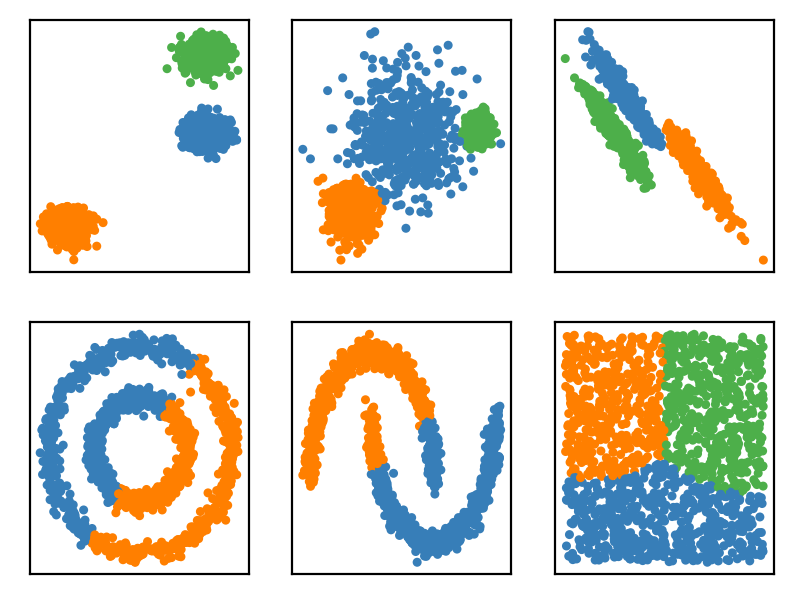

In [5]:
# создаём массив пар – датасета и соответствующих для него параметров алгоритма
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, k_means_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    gm = GaussianMixture(n_components=k_means_params['n_clusters'])
    
    gm.fit(X)
    y_pred = gm.predict(X).astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], s=5,color=colors[y_pred])

### <b><span style='color:#686dec'>Задание</span></b>

#### <b>Задание <span style='color:#F1A424'>4.6.1</span></b> 

В алгоритме K-means за число кластеров отвечал параметр n_clusters. Какой параметр задаёт число кластеров в EM-алгоритме?

In [6]:
models = GaussianMixture(n_components=3)

#### <b>Задание <span style='color:#F1A424'>4.6.2</span></b> 

Обучите модель `GaussianMixture` с параметрами `n_components=3` и `random_state=42` на признаках исходного датасета.

Какие центроиды будут у получившихся кластеров? Введите ответ в виде массива. Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round

In [3]:
# import numpy as np
# a = [0.4, 0.6, 1.7]
# print(np.round(a).astype(np.int))

[0 1 2]


In [9]:
model = GaussianMixture(n_components=3,
                        random_state=42)

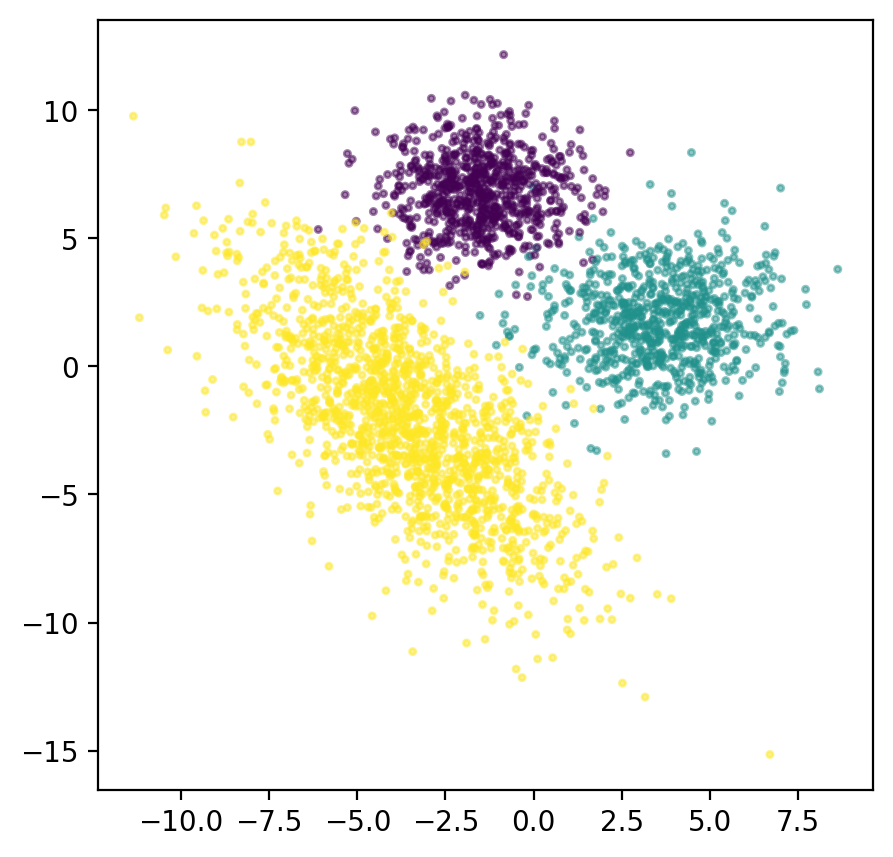

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

# Визуализируем исходные данные
plt.rcParams['figure.figsize'] = 5, 5
plt.scatter(X[:, 0], X[:, 1], s=5,c=y, alpha=0.5)
plt.show()

In [13]:
model.fit(X)
labels = model.predict(X)
centroids = model.means_
centroids

array([[-2.21861264, -4.15574239],
       [ 1.01124148,  4.31664695],
       [-4.94579669,  0.04257022]])

In [14]:
np.round(centroids).astype(int)

array([[-2, -4],
       [ 1,  4],
       [-5,  0]])

#### <b>Задание <span style='color:#F1A424'>4.6.3</span></b> 

- Подсчитайте количество элементов в каждом из получившихся кластеров. 
- Запишите в форму ниже три числа через пробел(без запятых!): количество элементов в кластере 0, в кластере 1 и в кластере 2.
- Записывайте строго в таком порядке.

Для подсчёта элементов в списке можно воспользоваться функцией `numpy.unique` с параметром `return_counts=True`

In [16]:
from collections import Counter

Counter(labels)

Counter({1: 1510, 0: 788, 2: 702})

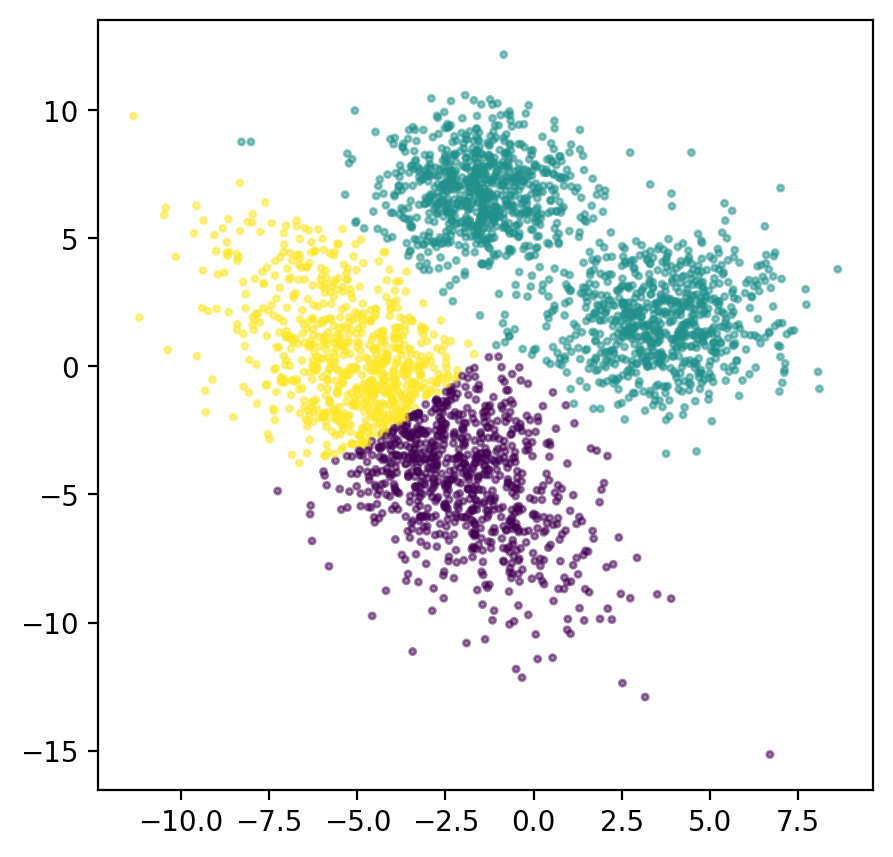

In [17]:
plt.rcParams['figure.figsize'] = 5, 5
plt.scatter(X[:, 0], X[:, 1], s=5,c=labels, alpha=0.5)
plt.show()